In [1]:
import pystan
import numpy as np
%matplotlib inline

In [2]:
model = """
data {
  int<lower=0> N;
  vector[N] x;
  vector[N] y;
}
parameters { 
  real alpha;
  real beta;
  real<lower=0> sigma;
}
model { 
  y ~ normal(alpha + beta * x, sigma);
}
"""

In [3]:
datum = np.loadtxt("women.tsv", delimiter="\t", usecols=(1, 2), skiprows=1)
weights = np.transpose(datum)[0]
heights = np.transpose(datum)[1]

In [4]:
datum

array([[  58.,  115.],
       [  59.,  117.],
       [  60.,  120.],
       [  61.,  123.],
       [  62.,  126.],
       [  63.,  129.],
       [  64.,  132.],
       [  65.,  135.],
       [  66.,  139.],
       [  67.,  142.],
       [  68.,  146.],
       [  69.,  150.],
       [  70.,  154.],
       [  71.,  159.],
       [  72.,  164.]])

In [5]:
fit = pystan.stan(model_code=model, data=dict(y=heights, x=weights, N=len(heights)))

In [6]:
fit

Inference for Stan model: anon_model_d5c9515652e6c049f3e6b6cc53cb45ed.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha -87.43    0.31   7.43 -102.3 -92.14 -87.52 -82.82 -73.09  577.0    1.0
beta    3.45  4.8e-3   0.11   3.23   3.38   3.45   3.52   3.68  578.0    1.0
sigma   1.72    0.02   0.41   1.15   1.43   1.65   1.93    2.7  544.0   1.01
lp__  -14.16    0.07   1.45 -17.85 -14.79 -13.79 -13.11 -12.51  409.0   1.01

Samples were drawn using NUTS(diag_e) at Tue Jul  5 16:47:07 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

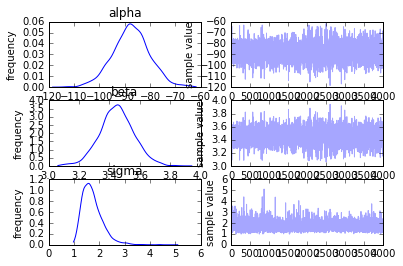

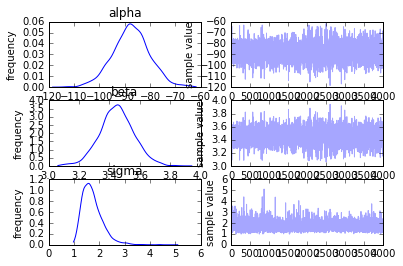

In [7]:
fit.plot()

In [8]:
import matplotlib.pyplot as plt

In [11]:
samples = fit.extract(permuted=True)
alpha = np.mean(samples["alpha"])
beta = np.mean(samples["beta"])

In [ ]:
samples

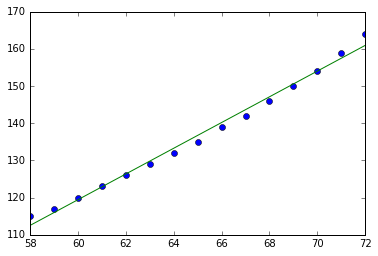

In [12]:
plt.plot(weights, heights, "o")
plt.plot(weights, alpha + beta * weights)
plt.show()